In [1]:
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Temporal Component

In [2]:
dset = xr.load_dataset("../../steinmetz_analysis/data/steinmetz_2017-01-08_Radnitz.nc")
dset

<xarray.Dataset>
Dimensions:             (trial: 371, time: 250, cell: 885,
                         waveform_component: 3, sample: 82, probe: 384,
                         brain_area_lfp: 11, spike_id: 2849983)
Coordinates:
  * trial               (trial) int32 1 2 3 4 5 6 7 ... 366 367 368 369 370 371
  * time                (time) float64 0.01 0.02 0.03 0.04 ... 2.48 2.49 2.5
  * cell                (cell) int32 1 2 3 4 5 6 7 ... 880 881 882 883 884 885
  * waveform_component  (waveform_component) int32 1 2 3
  * probe               (probe) int32 1 2 3 4 5 6 7 ... 379 380 381 382 383 384
  * brain_area_lfp      (brain_area_lfp) object 'ACA' 'DP' ... 'SCsg' 'VISp'
  * spike_id            (spike_id) int32 1 2 3 4 ... 2849981 2849982 2849983
Dimensions without coordinates: sample
Data variables: (12/31)
    contrast_left       (trial) int8 100 50 25 25 100 25 ... 0 100 100 100 0 100
    contrast_right      (trial) int8 0 25 100 0 0 25 50 ... 25 25 50 0 100 100
    gocue               (trial) float64 0.894 1.147 0.5024 1.123 ... nan nan nan
    stim_onset          (trial) float64 0.5 0.5 0.5 0.5 0.5 ... 0.5 0.5 0.5 0.5
    feedback_type       (trial) float64 1.0 1.0 1.0 1.0 1.0 ... nan nan nan nan
    feedback_time       (trial) float64 1.038 1.336 0.6696 2.368 ... nan nan nan
    ...                  ...
    waveform_w          (cell, sample, waveform_component) float32 0.0 ... -0...
    waveform_u          (cell, waveform_component, probe) float32 0.0 ... 0.0
    lfp                 (brain_area_lfp, trial, time) float64 -19.45 ... 12.91
    spike_time          (spike_id) float32 0.02847 0.7012 1.561 ... 2.089 2.278
    spike_cell          (spike_id) uint32 1 1 1 1 1 1 ... 885 885 885 885 885
    spike_trial         (spike_id) uint32 140 158 180 199 ... 369 369 370 371
Attributes:
    session_date:  2017-01-08
    mouse:         Radnitz
    stim_onset:    0.5
    bin_size:      0.01

#### What do these waveforms look like?

In [11]:
dset['waveform_w'].shape

(885, 82, 3)

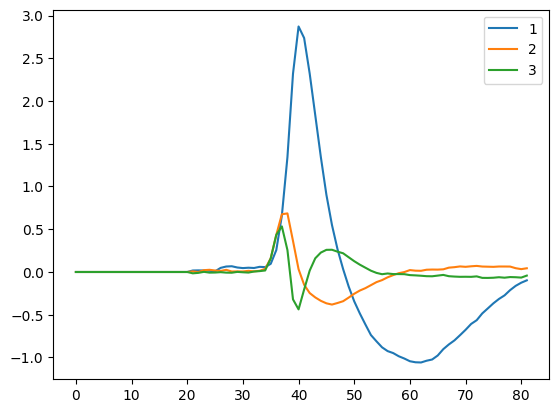

In [27]:
plt.plot(dset['waveform_w'].sel(cell=5));
plt.legend(['1', '2', '3'])

In [130]:
cell = 20
dd = dset.sel(cell=cell)
wave = dd.sel(waveform_component=1)['waveform_w'].values
t2p_calced = wave[wave.argmax():].argmin()
t2p_calced, dd['trough_to_peak'].item()

(12, 15)

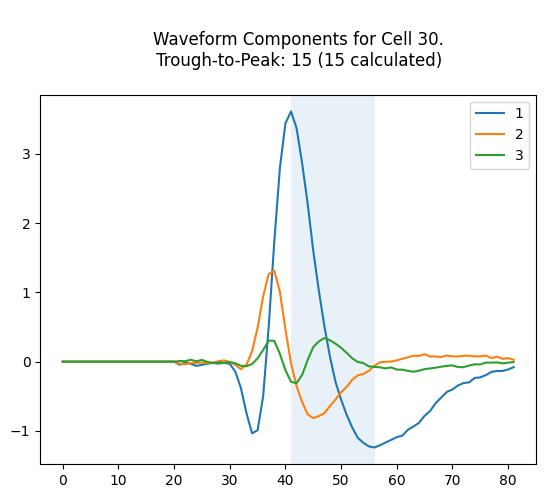

In [145]:
cell = 30
dd = dset.sel(cell=cell)
wave = dd.sel(waveform_component=1)['waveform_w'].values
trough = wave.argmax()
t2p_calced = wave[trough:].argmin()
peak = trough + t2p_calced

plt.plot(dd['waveform_w']);
plt.legend(['1', '2', '3'])
plt.title(f"""
    Waveform Components for Cell {cell}.
    Trough-to-Peak: {dd['trough_to_peak'].item()} ({t2p_calced} calculated)
""")
plt.axvspan(xmin=trough, xmax=peak, alpha=.1)

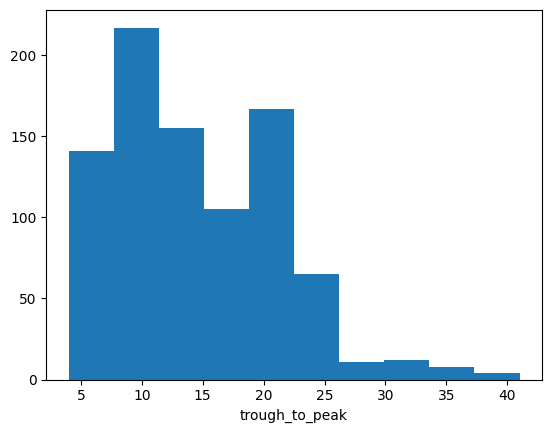

In [53]:
dset['trough_to_peak'].plot.hist(bins=10);

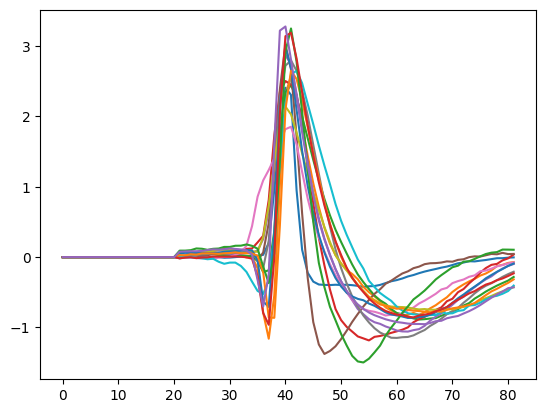

In [166]:
waveforms = dset.sel(waveform_component=1, drop=True)['waveform_w'].to_dataframe().unstack()[:15]
plt.plot(waveforms.T.values);

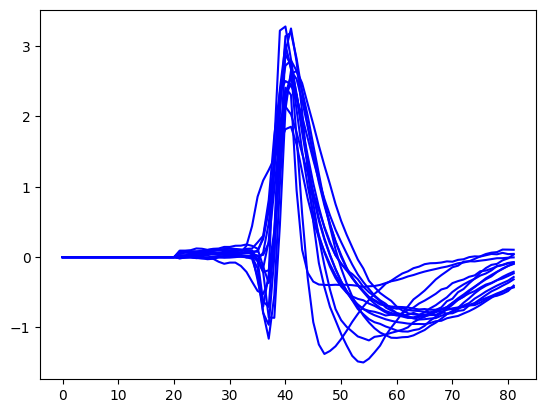

In [167]:
waveforms = dset.sel(waveform_component=1, drop=True)['waveform_w'].to_dataframe().unstack()[:15]
plt.plot(waveforms.T.values, c='blue');

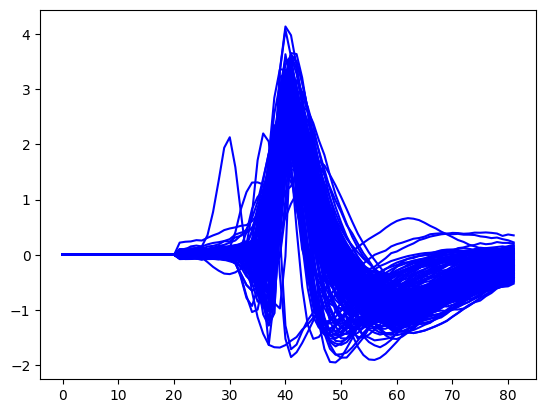

In [169]:
waveforms = dset.sel(waveform_component=1, drop=True)['waveform_w'].to_dataframe().unstack()[:200]
plt.plot(waveforms.T.values, c='blue');

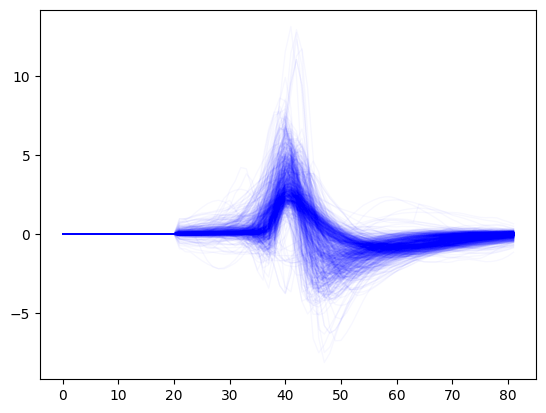

In [195]:
waveforms = dset.sel(waveform_component=1, drop=True)['waveform_w'].to_dataframe().unstack()
plt.plot(waveforms.T.values, c='blue', alpha=.03, linewidth=1.);

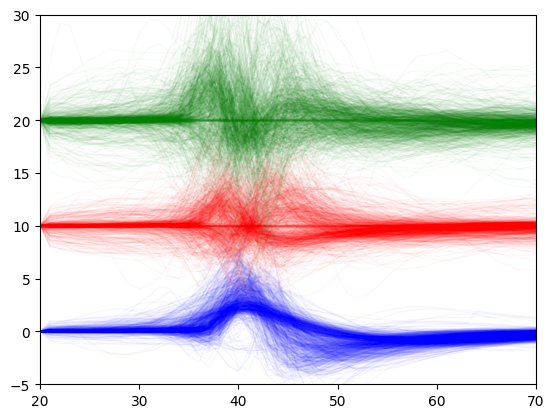

In [256]:
waveforms = dset['waveform_w'].to_dataframe().unstack().unstack()['waveform_w']
plt.plot(waveforms[1].T.values, c='blue', alpha=.03, linewidth=1.);
plt.plot(waveforms[2].T.values * 3 + 10, c='red', alpha=.03, linewidth=1.);
plt.plot(waveforms[3].T.values * 10 + 20, c='green', alpha=.03, linewidth=1.);
plt.xlim(20, 70);
plt.ylim(-5, 30);

### Spatial Component

In [83]:
dset = xr.load_dataset("../../steinmetz_analysis/data/steinmetz_2017-12-09_Lederberg.nc")
dset

<xarray.Dataset>
Dimensions:             (trial: 390, time: 250, cell: 474,
                         waveform_component: 3, sample: 82, probe: 384,
                         brain_area_lfp: 6, spike_id: 1401768)
Coordinates:
  * trial               (trial) int32 1 2 3 4 5 6 7 ... 385 386 387 388 389 390
  * time                (time) float64 0.01 0.02 0.03 0.04 ... 2.48 2.49 2.5
  * cell                (cell) int32 1 2 3 4 5 6 7 ... 469 470 471 472 473 474
  * waveform_component  (waveform_component) int32 1 2 3
  * probe               (probe) int32 1 2 3 4 5 6 7 ... 379 380 381 382 383 384
  * brain_area_lfp      (brain_area_lfp) object 'SSp' 'SSs' 'CA3' ... 'MB' 'TH'
  * spike_id            (spike_id) int32 1 2 3 4 ... 1401766 1401767 1401768
Dimensions without coordinates: sample
Data variables: (12/31)
    contrast_left       (trial) int8 100 0 0 0 100 100 0 0 ... 0 0 100 0 0 100 0
    contrast_right      (trial) int8 25 0 0 0 100 50 50 ... 100 0 25 25 25 50
    gocue               (trial) float64 0.7228 0.6989 0.7388 ... nan nan nan
    stim_onset          (trial) float64 0.5 0.5 0.5 0.5 0.5 ... 0.5 0.5 0.5 0.5
    feedback_type       (trial) float64 1.0 1.0 -1.0 1.0 ... nan nan nan nan
    feedback_time       (trial) float64 0.974 2.237 0.9674 2.288 ... nan nan nan
    ...                  ...
    waveform_w          (cell, sample, waveform_component) float32 0.0 ... -0...
    waveform_u          (cell, waveform_component, probe) float32 0.0 ... 0.0
    lfp                 (brain_area_lfp, trial, time) float64 -0.006393 ... 9...
    spike_time          (spike_id) float32 0.8677 0.9854 2.268 ... 1.278 0.1609
    spike_cell          (spike_id) uint32 1 1 1 1 1 1 ... 474 474 474 474 474
    spike_trial         (spike_id) uint32 2 2 2 4 4 4 ... 380 380 380 381 388
Attributes:
    session_date:  2017-12-09
    mouse:         Lederberg
    stim_onset:    0.5
    bin_size:      0.01

In [84]:
weights = dset.sel(waveform_component=1, drop=True)[['waveform_u']]
weights

<xarray.Dataset>
Dimensions:     (cell: 474, probe: 384)
Coordinates:
  * cell        (cell) int32 1 2 3 4 5 6 7 8 ... 467 468 469 470 471 472 473 474
  * probe       (probe) int32 1 2 3 4 5 6 7 8 ... 378 379 380 381 382 383 384
Data variables:
    waveform_u  (cell, probe) float32 0.0 0.0 -0.02823 -0.03031 ... 0.0 0.0 0.0
Attributes:
    session_date:  2017-12-09
    mouse:         Lederberg
    stim_onset:    0.5
    bin_size:      0.01

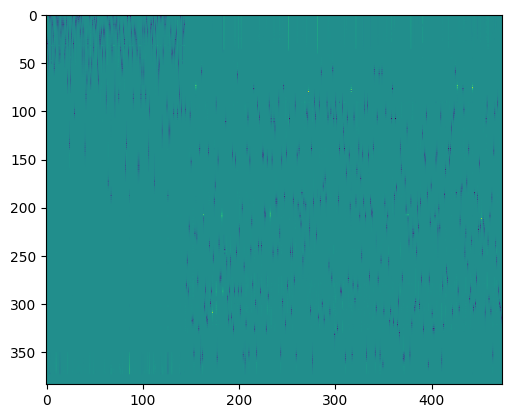

In [85]:
plt.imshow(weights['waveform_u'].T);

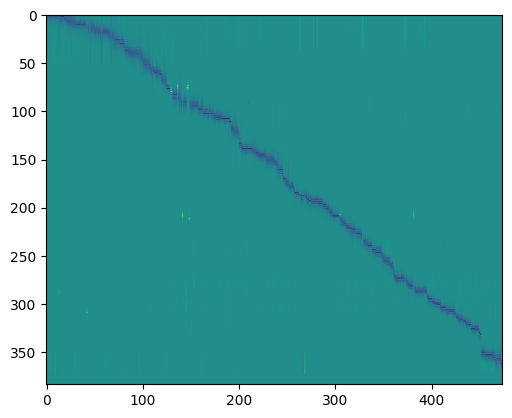

In [86]:
order = np.argsort(weights['waveform_u'].argmin(dim='probe'))
vals = weights['waveform_u'].values[order, :]
plt.imshow(vals.T);


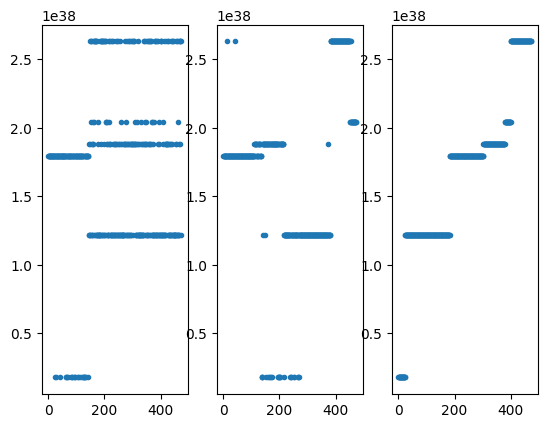

In [87]:
from hashlib import md5
inthash = lambda s: int(md5(s.encode()).hexdigest(), 16)
aa = np.array([inthash(val) for val in dset['brain_area'].values])
order2 = np.argsort(aa)
fig, axes = plt.subplots(ncols=3)
axes[0].plot(aa, '.')
axes[1].plot(aa[order.values], '.')
axes[2].plot(aa[order2], '.')
# hash

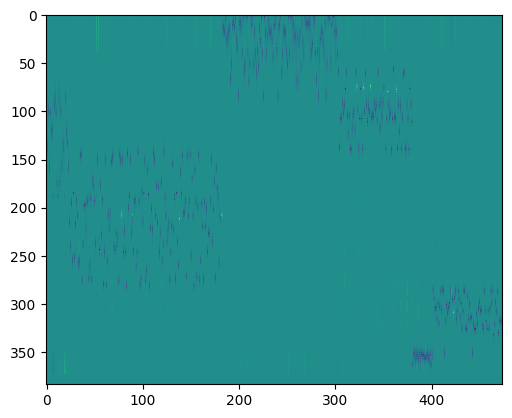

In [89]:
vals = weights['waveform_u'].values[order2, :]
plt.imshow(vals.T);


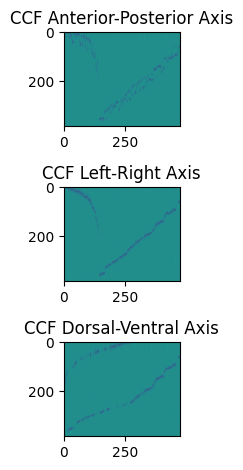

In [90]:
fig, axes = plt.subplots(nrows=3)

order3 = dset['ccf_ap'].argsort().values
vals = weights['waveform_u'].values[order3, :]
axes[0].imshow(vals.T);
axes[0].set(title='CCF Anterior-Posterior Axis')

order3 = dset['ccf_lr'].argsort().values
vals = weights['waveform_u'].values[order3, :]
axes[1].imshow(vals.T);
axes[1].set(title='CCF Left-Right Axis')

order3 = dset['ccf_dv'].argsort().values
vals = weights['waveform_u'].values[order3, :]
axes[2].imshow(vals.T);
axes[2].set(title='CCF Dorsal-Ventral Axis')

plt.tight_layout();
